In [4]:
import pandas as pd
import numpy as np
import os.path
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.linear_model import Lasso, Ridge, ElasticNet, LinearRegression, LassoCV, RidgeCV, ElasticNetCV

from sklearn.pipeline import make_pipeline

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import (cross_val_score, train_test_split, 
                                     KFold, GridSearchCV)
import scipy.stats as stats


from sklearn.metrics import r2_score, mean_squared_error

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [5]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import lars_path
from sklearn.linear_model import ElasticNet



In [6]:
import warnings
warnings.filterwarnings("ignore")

In [7]:
nba = pd.read_csv('nba_v3.csv')

In [8]:
nba.columns

Index(['Unnamed: 0', 'Name', 'Team', 'Age', 'Games', 'Games_Start', 'Min_PG',
       'Field_Goals', 'Field_Goals_Attempts', '3Point_Goals',
       '3Point_Goals_Attempts', '2Point_Goals', '2Point_Goals_Attempts',
       'Effective_Field_Goal_Per', 'Free_Throw', 'Free_Throw_Attempts',
       'Offensive_Rebounds', 'Defensive_Rebounds', 'Assists', 'Steals',
       'Blocks', 'Turnovers', 'Points', 'Position', 'Year', 'Salary'],
      dtype='object')

In [9]:
nba = nba.drop('Unnamed: 0', axis = 1)

In [10]:
nba['Salary'] = nba['Salary'] / (1000000) # Salary in Million

In [12]:
nba['Salary'].describe()

count    1106.000000
mean        7.576742
std         7.657705
min         0.004737
25%         1.967220
50%         4.148520
75%        10.830309
max        31.626953
Name: Salary, dtype: float64

In [19]:
nba_v1= nba._get_numeric_data()

X, y = nba_v1.drop(columns = ['Salary']), nba_v1['Salary']

In [20]:
#Split the data into test/train

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
kfold = KFold(n_splits=5, shuffle=True, random_state=0)

In [22]:
#Feature transforms for train and test so that we can run our poly model on each
scaler = StandardScaler()
poly = PolynomialFeatures(degree=2) 

#X_train_sca_poly = poly.fit_transform(X_train_scaled)
#X_test_sca_poly = poly.transform(X_test_scaled)

param_poly =  {'lasso__alpha':np.logspace(-4, 2, 100)}

#Setting up a pipeline
pipe = Pipeline([('scaler', StandardScaler()),('poly', PolynomialFeatures(degree=2)), ('lasso', Lasso())])

#pipe.get_params().keys()

#setting up the grid search
grid_poly = GridSearchCV(pipe,param_poly,scoring='r2',cv=kfold)


#fitting grid search to training data
grid_result_poly = grid_poly.fit(X_train, y_train)

# View best parameter
print('Best Score: ', grid_result_poly.best_score_)
print('Best Param: ', grid_result_poly.best_params_)


Best Score:  0.5672438074435703
Best Param:  {'lasso__alpha': 0.14174741629268048}


In [23]:
grid_poly.best_estimator_.steps[2][1]

Lasso(alpha=0.14174741629268048)

In [24]:
print('Feature coefficient results for the Poly(degree= 2), Lasso with All Numerical Features: \n')
for feature, coef in zip(X_train.columns, grid_poly.best_estimator_.steps[2][1].coef_):
    print(feature, ':', f'{coef:.2f}') 



# score fit model on test data
print('R Square for the train data :', grid_result_poly.score(X_train, y_train))
print('R Square for the test data:', grid_result_poly.score(X_test, y_test))



Feature coefficient results for the Poly(degree= 2), Lasso with All Numerical Features: 

Age : 0.00
Games : 2.84
Games_Start : -0.35
Min_PG : 0.02
Field_Goals : 2.02
Field_Goals_Attempts : 0.00
3Point_Goals : 0.64
3Point_Goals_Attempts : 0.00
2Point_Goals : 0.00
2Point_Goals_Attempts : 0.00
Effective_Field_Goal_Per : 0.59
Free_Throw : -0.00
Free_Throw_Attempts : 0.00
Offensive_Rebounds : 0.00
Defensive_Rebounds : 0.05
Assists : 0.60
Steals : 0.00
Blocks : 0.00
Turnovers : 0.00
Points : 0.29
Year : 0.00
R Square for the train data : 0.6228689629137723
R Square for the test data: 0.5987907856832946


In [25]:
print('Feature coefficient results for the Poly(degree= 2), Lasso with All Numerical Features: \n')
for feature, coef in zip(grid_poly.best_estimator_.steps[1][1].get_feature_names(), grid_poly.best_estimator_.steps[2][1].coef_):
    print(feature, ':', f'{coef:.2f}') 



Feature coefficient results for the Poly(degree= 2), Lasso with All Numerical Features: 

1 : 0.00
x0 : 2.84
x1 : -0.35
x2 : 0.02
x3 : 2.02
x4 : 0.00
x5 : 0.64
x6 : 0.00
x7 : 0.00
x8 : 0.00
x9 : 0.59
x10 : -0.00
x11 : 0.00
x12 : 0.00
x13 : 0.05
x14 : 0.60
x15 : 0.00
x16 : 0.00
x17 : 0.00
x18 : 0.29
x19 : 0.00
x20 : 0.00
x0^2 : -0.15
x0 x1 : -0.28
x0 x2 : 0.44
x0 x3 : 0.00
x0 x4 : 0.00
x0 x5 : 0.00
x0 x6 : 0.14
x0 x7 : 0.00
x0 x8 : 0.00
x0 x9 : 0.00
x0 x10 : 0.00
x0 x11 : 0.50
x0 x12 : 0.00
x0 x13 : 0.00
x0 x14 : 0.92
x0 x15 : 0.53
x0 x16 : 0.12
x0 x17 : -0.00
x0 x18 : 0.00
x0 x19 : 0.04
x0 x20 : -0.14
x1^2 : 0.00
x1 x2 : -0.00
x1 x3 : 0.00
x1 x4 : 0.00
x1 x5 : 0.00
x1 x6 : -0.36
x1 x7 : -0.00
x1 x8 : 0.00
x1 x9 : 0.00
x1 x10 : -0.00
x1 x11 : 0.00
x1 x12 : 0.00
x1 x13 : 0.00
x1 x14 : -0.00
x1 x15 : 0.00
x1 x16 : 0.03
x1 x17 : 0.03
x1 x18 : -0.00
x1 x19 : 0.00
x1 x20 : -0.07
x2^2 : 0.00
x2 x3 : 0.00
x2 x4 : 0.00
x2 x5 : 0.00
x2 x6 : -0.00
x2 x7 : -0.00
x2 x8 : 0.63
x2 x9 : 0.00
x2 x10 : 

In [26]:
 y - grid_result_poly.predict(X)

0       -0.294259
1        0.114566
2       -1.802282
3        0.042372
4       -4.277542
          ...    
1101    -2.671725
1102    10.392306
1103    -2.438692
1104    -0.542382
1105    11.896301
Name: Salary, Length: 1106, dtype: float64

In [27]:
y_df = y.to_frame()
y_df['Predicted'] =  grid_result_poly.predict(X)
y_df['Error'] = y_df['Salary'] - y_df['Predicted']
y_df

,Salary,Predicted,Error
0,10.245480,10.539739,-0.294259
1,2.379840,2.265274,0.114566
2,19.500000,21.302282,-1.802282
3,3.218930,3.176558,0.042372
4,1.737145,6.014687,-4.277542
...,...,...,...
1101,6.957105,9.628830,-2.671725
1102,28.928710,18.536404,10.392306
1103,1.378242,3.816934,-2.438692
1104,1.911960,2.454342,-0.542382


In [28]:
test = pd.concat([y_df, X], axis=1)
test

,Salary,Predicted,Error,Age,Games,Games_Start,Min_PG,Field_Goals,Field_Goals_Attempts,3Point_Goals,...,Free_Throw,Free_Throw_Attempts,Offensive_Rebounds,Defensive_Rebounds,Assists,Steals,Blocks,Turnovers,Points,Year
0,10.245480,10.539739,-0.294259,20,61,61,33.2,10.4,17.0,0.2,...,6.0,6.0,2.7,4.5,3.7,0.9,0.6,2.7,27.0,2021
1,2.379840,2.265274,0.114566,20,42,1,9.5,1.2,2.5,0.6,...,0.3,0.3,0.3,1.2,0.2,0.2,0.1,0.2,3.2,2021
2,19.500000,21.302282,-1.802282,25,58,58,35.1,9.8,19.4,3.4,...,4.4,4.4,0.6,4.4,4.9,0.8,0.5,3.5,27.4,2021
3,3.218930,3.176558,0.042372,26,50,4,14.5,1.6,3.6,0.7,...,0.5,0.5,0.7,2.5,0.8,0.5,0.4,0.4,4.4,2021
4,1.737145,6.014687,-4.277542,26,47,12,18.0,3.2,5.7,0.0,...,1.3,1.3,2.5,4.6,1.1,0.5,0.5,0.7,7.8,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1101,6.957105,9.628830,-2.671725,28,81,81,28.3,3.2,7.3,1.2,...,1.9,1.9,1.4,6.1,1.3,0.8,0.4,0.9,9.4,2019
1102,28.928710,18.536404,10.392306,32,68,68,29.0,5.7,10.6,1.1,...,1.1,1.1,1.8,5.0,4.2,0.9,1.3,1.5,13.6,2019
1103,1.378242,3.816934,-2.438692,25,61,1,11.4,1.5,3.5,0.5,...,0.4,0.4,0.2,1.7,0.3,0.3,0.2,0.4,4.0,2019
1104,1.911960,2.454342,-0.542382,22,50,0,12.9,2.1,5.2,0.9,...,0.8,0.8,0.1,1.2,1.7,0.4,0.3,0.8,5.9,2019


In [29]:
test_2021 = test[test['Year'] ==2021]
test_2021

,Salary,Predicted,Error,Age,Games,Games_Start,Min_PG,Field_Goals,Field_Goals_Attempts,3Point_Goals,...,Free_Throw,Free_Throw_Attempts,Offensive_Rebounds,Defensive_Rebounds,Assists,Steals,Blocks,Turnovers,Points,Year
0,10.245480,10.539739,-0.294259,20,61,61,33.2,10.4,17.0,0.2,...,6.0,6.0,2.7,4.5,3.7,0.9,0.6,2.7,27.0,2021
1,2.379840,2.265274,0.114566,20,42,1,9.5,1.2,2.5,0.6,...,0.3,0.3,0.3,1.2,0.2,0.2,0.1,0.2,3.2,2021
2,19.500000,21.302282,-1.802282,25,58,58,35.1,9.8,19.4,3.4,...,4.4,4.4,0.6,4.4,4.9,0.8,0.5,3.5,27.4,2021
3,3.218930,3.176558,0.042372,26,50,4,14.5,1.6,3.6,0.7,...,0.5,0.5,0.7,2.5,0.8,0.5,0.4,0.4,4.4,2021
4,1.737145,6.014687,-4.277542,26,47,12,18.0,3.2,5.7,0.0,...,1.3,1.3,2.5,4.6,1.1,0.5,0.5,0.7,7.8,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,27.500000,19.820421,7.679579,34,28,28,27.9,5.8,12.9,2.0,...,0.6,0.6,1.0,5.7,3.4,0.9,0.9,1.0,14.2,2021
353,1.752950,4.689889,-2.936939,27,24,0,14.8,2.4,4.8,0.8,...,1.2,1.2,0.3,2.3,0.8,0.4,0.4,0.8,6.7,2021
354,3.458400,2.558649,0.899751,21,46,1,14.5,1.7,3.9,0.9,...,0.5,0.5,0.6,2.2,0.5,0.3,0.2,0.5,4.7,2021
355,2.345640,3.385650,-1.040010,24,66,8,17.8,2.6,6.6,1.0,...,1.0,1.0,0.2,1.1,1.9,0.7,0.2,1.0,7.2,2021


In [31]:
df = test_2021.sort_values(by = ['Error'], ascending=True).head(15)
df

,Salary,Predicted,Error,Age,Games,Games_Start,Min_PG,Field_Goals,Field_Goals_Attempts,3Point_Goals,...,Free_Throw,Free_Throw_Attempts,Offensive_Rebounds,Defensive_Rebounds,Assists,Steals,Blocks,Turnovers,Points,Year
260,5.195501,18.184971,-12.989470,24,53,53,33.4,9.0,20.6,3.4,...,5.0,5.0,0.9,3.5,5.2,1.0,0.3,2.8,26.4,2021
252,2.564753,12.580211,-10.015458,35,69,6,17.3,2.6,4.4,0.1,...,1.8,1.8,2.8,5.7,0.9,0.4,0.9,1.6,7.0,2021
243,5.005350,14.064115,-9.058765,28,72,35,24.4,4.7,7.8,0.0,...,1.8,1.8,3.9,7.1,1.2,0.5,0.7,1.1,11.2,2021
128,8.049360,17.073382,-9.024022,21,66,66,34.3,9.8,20.5,2.9,...,5.2,5.2,0.8,7.2,8.6,1.0,0.5,4.3,27.7,2021
116,8.000000,16.970937,-8.970937,30,56,56,26.8,4.2,6.8,0.0,...,2.0,2.0,2.6,6.7,3.6,0.8,0.9,1.9,10.4,2021
341,5.115492,13.898234,-8.782742,23,64,64,33.5,7.1,12.5,0.0,...,4.4,4.4,2.2,6.7,5.4,1.2,1.0,2.6,18.7,2021
182,2.564753,10.722235,-8.157482,34,68,38,27.0,3.8,7.8,1.5,...,1.8,1.8,0.5,3.4,1.6,0.5,0.4,0.8,11.0,2021
111,3.300000,11.200901,-7.900901,29,31,25,25.8,3.4,8.7,0.5,...,1.6,1.6,1.3,3.2,4.2,0.8,0.5,2.2,8.8,2021
283,8.099627,15.739631,-7.640004,23,58,58,35.1,9.1,19.1,1.8,...,5.2,5.2,0.6,2.9,7.2,1.5,0.5,3.0,25.2,2021
267,3.516284,10.983585,-7.467301,26,36,32,29.6,5.2,12.6,2.3,...,2.7,2.7,0.4,2.6,3.5,0.7,1.0,1.3,15.4,2021


In [32]:
df.reset_index(inplace=True)

In [33]:
 nba.reset_index(inplace=True)

In [34]:
underpaid = pd.merge(df, nba, how='left', on=['index'])
underpaid

,index,Salary_x,Predicted,Error,Age_x,Games_x,Games_Start_x,Min_PG_x,Field_Goals_x,Field_Goals_Attempts_x,...,Offensive_Rebounds_y,Defensive_Rebounds_y,Assists_y,Steals_y,Blocks_y,Turnovers_y,Points_y,Position,Year_y,Salary_y
0,260,5.195501,18.184971,-12.989470,24,53,53,33.4,9.0,20.6,...,0.9,3.5,5.2,1.0,0.3,2.8,26.4,Shooting Guard and Point Guard,2021,5.195501
1,252,2.564753,12.580211,-10.015458,35,69,6,17.3,2.6,4.4,...,2.8,5.7,0.9,0.4,0.9,1.6,7.0,Center and Power Forward,2021,2.564753
2,243,5.005350,14.064115,-9.058765,28,72,35,24.4,4.7,7.8,...,3.9,7.1,1.2,0.5,0.7,1.1,11.2,Center,2021,5.005350
3,128,8.049360,17.073382,-9.024022,21,66,66,34.3,9.8,20.5,...,0.8,7.2,8.6,1.0,0.5,4.3,27.7,Point Guard and Shooting Guard,2021,8.049360
4,116,8.000000,16.970937,-8.970937,30,56,56,26.8,4.2,6.8,...,2.6,6.7,3.6,0.8,0.9,1.9,10.4,Center,2021,8.000000
5,341,5.115492,13.898234,-8.782742,23,64,64,33.5,7.1,12.5,...,2.2,6.7,5.4,1.2,1.0,2.6,18.7,Center and Power Forward,2021,5.115492
6,182,2.564753,10.722235,-8.157482,34,68,38,27.0,3.8,7.8,...,0.5,3.4,1.6,0.5,0.4,0.8,11.0,"Power Forward, Small Forward, and Center",2021,2.564753
7,111,3.300000,11.200901,-7.900901,29,31,25,25.8,3.4,8.7,...,1.3,3.2,4.2,0.8,0.5,2.2,8.8,Point Guard and Shooting Guard,2021,3.300000
8,283,8.099627,15.739631,-7.640004,23,58,58,35.1,9.1,19.1,...,0.6,2.9,7.2,1.5,0.5,3.0,25.2,Point Guard,2021,8.099627
9,267,3.516284,10.983585,-7.467301,26,36,32,29.6,5.2,12.6,...,0.4,2.6,3.5,0.7,1.0,1.3,15.4,Shooting Guard and Point Guard,2021,3.516284


In [35]:
underpaid.Name

0            Donovan Mitchell
1               Dwight Howard
2                 Enes Kanter
3                 Luka Dončić
4               Mason Plumlee
5                 Bam Adebayo
6                  Jeff Green
7     Michael Carter-Williams
8                De'Aaron Fox
9               Derrick White
10              Kendrick Nunn
11             Richaun Holmes
12              Collin Sexton
13            Carmelo Anthony
14            Devonte' Graham
Name: Name, dtype: object

In [38]:
stdev = np.sqrt(sum((grid_result_poly.predict(X) - y)**2) / (len(y) - 2))

In [40]:
underpaid['Upper'] = underpaid['Predicted']+1.96*stdev

In [46]:
underpaid[['Salary_x','Predicted','Upper']]

,Salary_x,Predicted,Upper
0,5.195501,18.184971,27.461907
1,2.564753,12.580211,21.857147
2,5.005350,14.064115,23.341051
3,8.049360,17.073382,26.350318
4,8.000000,16.970937,26.247873
5,5.115492,13.898234,23.175170
6,2.564753,10.722235,19.999171
7,3.300000,11.200901,20.477837
8,8.099627,15.739631,25.016567
9,3.516284,10.983585,20.260521


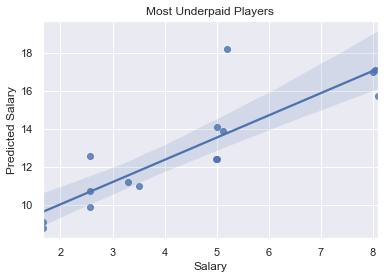

In [52]:
fig = sns.regplot('Salary_x','Predicted', data=underpaid)
fig.set(xlabel='Salary',ylabel = 'Predicted Salary', title = 'Most Underpaid Players')

plt.savefig('underpaid.png');

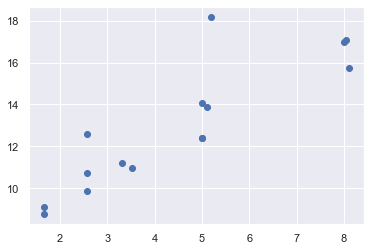

In [57]:
import matplotlib.pyplot as plt
plt.scatter(underpaid.Salary_x, underpaid.Predicted)
plt.show()

In [44]:
nba.describe()

,index,Age,Games,Games_Start,Min_PG,Field_Goals,Field_Goals_Attempts,3Point_Goals,3Point_Goals_Attempts,2Point_Goals,...,Free_Throw_Attempts,Offensive_Rebounds,Defensive_Rebounds,Assists,Steals,Blocks,Turnovers,Points,Year,Salary
count,1106.000000,1106.000000,1106.000000,1106.000000,1106.000000,1106.000000,1106.000000,1106.000000,1106.000000,1106.000000,...,1106.000000,1106.000000,1106.000000,1106.000000,1106.000000,1106.000000,1106.000000,1106.000000,1106.000000,1106.000000
mean,552.500000,25.791139,53.195298,26.288427,22.242948,3.712568,8.056691,1.088427,3.036799,2.625316,...,1.551266,0.941501,3.186076,2.183906,0.696383,0.462387,1.228662,10.060940,2019.985533,7.576742
std,319.419004,4.074060,16.879284,25.853695,8.002674,2.165533,4.520173,0.853278,2.192028,1.829673,...,1.362883,0.788346,1.818379,1.755981,0.371210,0.429832,0.772726,6.035109,0.812665,7.657705
min,0.000000,19.000000,18.000000,0.000000,3.500000,0.200000,0.500000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.400000,0.000000,0.000000,0.000000,0.100000,0.800000,2019.000000,0.004737
25%,276.250000,23.000000,40.250000,3.000000,16.100000,2.100000,4.600000,0.400000,1.400000,1.300000,...,0.600000,0.400000,1.900000,1.000000,0.400000,0.200000,0.700000,5.600000,2019.000000,1.967220
50%,552.500000,25.000000,56.000000,17.000000,22.500000,3.200000,7.000000,0.950000,2.700000,2.100000,...,1.100000,0.700000,2.900000,1.600000,0.600000,0.300000,1.000000,8.700000,2020.000000,4.148520
75%,828.750000,28.000000,67.000000,50.000000,28.975000,4.875000,10.600000,1.600000,4.400000,3.500000,...,2.000000,1.200000,3.900000,2.900000,0.900000,0.600000,1.600000,13.075000,2021.000000,10.830309
max,1105.000000,43.000000,82.000000,82.000000,37.600000,11.200000,24.500000,4.800000,13.200000,10.200000,...,9.700000,5.400000,11.400000,9.400000,2.300000,3.400000,5.000000,36.100000,2021.000000,31.626953
